# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Some Brief Notes on the Bootstrap__ <br>

Author:  Tyler J. Brough <br>
Updated: April 11, 2022 <br>

---

<br>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
## set the prng seed value
np.random.seed(3456789)

## __Simulate the Population Model__

In [3]:
## Let's assume our population is Poisson with \lambda = 5.0
λ = 5.0


## Set the number of observations
N = 100

## Generate the "sample"
x = np.random.poisson(lam=λ, size=N)

<AxesSubplot:ylabel='Density'>

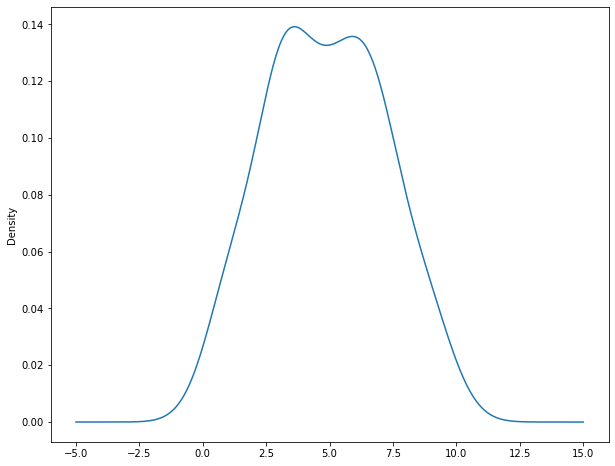

In [4]:
xs = pd.Series(x)
xs.plot.kde()

<br>
<br>

<div class="alert alert-warning">
    <font size="+2">
    <b>NB:</b> Don't get confused by this first simulation step. Normally you will use your sample data here. I just simulated data for convenience. So think of this data as having come from the real-world representing some interesting problem.
    </font>
</div>

<br>
<br>

### __Confidence Interval via CLT__

In [5]:
## Get the point estimate (MLE)
x̄ = np.mean(x)
x̄ 

4.86

In [6]:
## Set the confidence level
α = 0.05 

t_crit = stats.t(N-1).ppf(1.0 - (α / 2.0))

In [7]:
t_crit

1.9842169515086827

In [8]:
s = np.std(x, ddof=1)
s

2.326917586539208

In [9]:
## Calculate the standard error
se = s / np.sqrt(N)

In [10]:
## Calculate a 95% CI based on the CLT
ci = (x̄ - t_crit * se, x̄ + t_crit * se)

In [11]:
ci

(4.398289068002524, 5.321710931997477)

### __Bootstrap Confidence Interval (w/o the CLT)__

<br>
<br>

#### __An Aside: The Empirical CDF__

---

Let $X_{1}, X_{2}, \ldots, X_{n}$ be independent, identically distributed real random variables witih the common CDF $F(t)$. Then the __empirical cumulative distribution function (eCDF)__ is defined as

<br>

$$
\hat{F_{n}}(t) = \frac{1}{n} \sum\limits_{i=1}^{n} \mathbf{{I}}\{x_{i} \le t\}
$$

<br>

where $\mathbf{{I}}\{x_{i} \le t\}$ is an indicator function. 

---

<br>
<br>

In [12]:
## Let's compare the ECDF to the CDF for draws from a normal distribution

## Draw M = 100_000 values from a std normal
M = 100_000
z = np.random.normal(size=M)

In [13]:
## Sort the draws (inplace)
z.sort()

In [14]:
## Now let's get the CDF of 1.96
stats.norm.cdf(1.96)

0.9750021048517795

In [15]:
## Let' compare the ECDF of 1.96
ii = z >= 1.96
1.0 - np.sum(ii) / M

0.97566

<br>

__NB:__ These results are practically the same. The ECDF does not know these data are normal. For additional accuracy we can increase M

<br>

In [16]:
## We can also compare the Inverse CDF and the Inverse ECDF

## Get the 97.5th quantile of the std normal
stats.norm.ppf(0.975)

1.959963984540054

In [17]:
## Get the 97.5th quantile of the empirical data
jj = int(0.975 * M)
z[jj]

1.9480446453512055

<br>

__NB:__ Again these are practically the same. And for additional accuracy you can increase M.

<br>

##### __Back to the Bootstrap__

<br>

In [18]:
np.random.choice(x, replace=True, size=N)

array([6, 3, 7, 9, 7, 7, 7, 7, 6, 3, 3, 6, 5, 7, 6, 4, 7, 3, 8, 5, 3, 3,
       5, 3, 3, 8, 5, 8, 5, 1, 1, 3, 2, 6, 7, 6, 8, 4, 6, 1, 7, 4, 5, 3,
       1, 0, 5, 1, 2, 5, 3, 6, 6, 3, 5, 7, 5, 3, 7, 4, 7, 9, 7, 4, 3, 7,
       1, 4, 6, 3, 7, 7, 1, 9, 9, 4, 6, 5, 4, 0, 2, 8, 4, 2, 1, 3, 7, 7,
       1, 9, 6, 7, 7, 6, 1, 3, 8, 6, 3, 8])

In [19]:
## Decide how many bootstrap repititions
B = 10_000

## Store the bootstrapped mean
x̄_b = np.zeros(B)

## Run the bootstrap loop
for b in range(B):
    xb = np.random.choice(x, replace=True, size=N)
    x̄_b[b] = np.mean(xb)

In [20]:
## Standardize the bootstrapped data
y = (x̄_b - x̄) / np.std(x̄_b, ddof=1)

In [21]:
## Do a spot check

## Mean should be approximately zero and variance should be approximately 1
y.mean(), y.std(ddof=1)

(-0.0011785253206828387, 1.0)

In [22]:
## Sort y just for good measure
y.sort()

In [23]:
## Get the bootstrap critical value using the Inverse ECDF
q = 1.0 - α / 2.0
jj = int(q * B)
b_crit = y[jj]
b_crit

1.9930942923289239

In [24]:
se_b = x̄_b.std(ddof=1)

In [25]:
## Calculate the bootstrapped Confidence Interval
ci_b = (x̄ - b_crit * se_b, x̄ + b_crit * se_b)
ci_b

(4.4, 5.32)

<br>

<div class="alert alert-success">
    <b>NB:</b> We get the same approximate result without having assumed anything about the sampling distribution (i.e. by applying a CLT assumption). Rather we bootstrapped the sampling distribution directly. 
</div>

<br>